<a href="https://colab.research.google.com/github/SriTejaRao92/Customer-Churn-Prediction/blob/main/Eda_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (7043, 21)


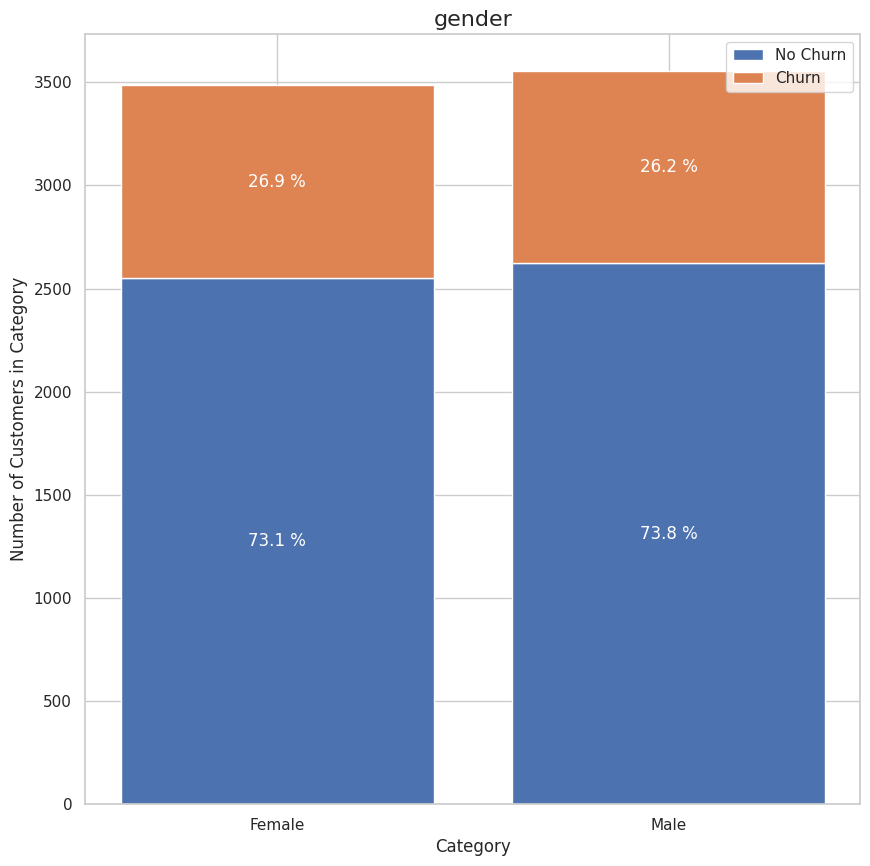

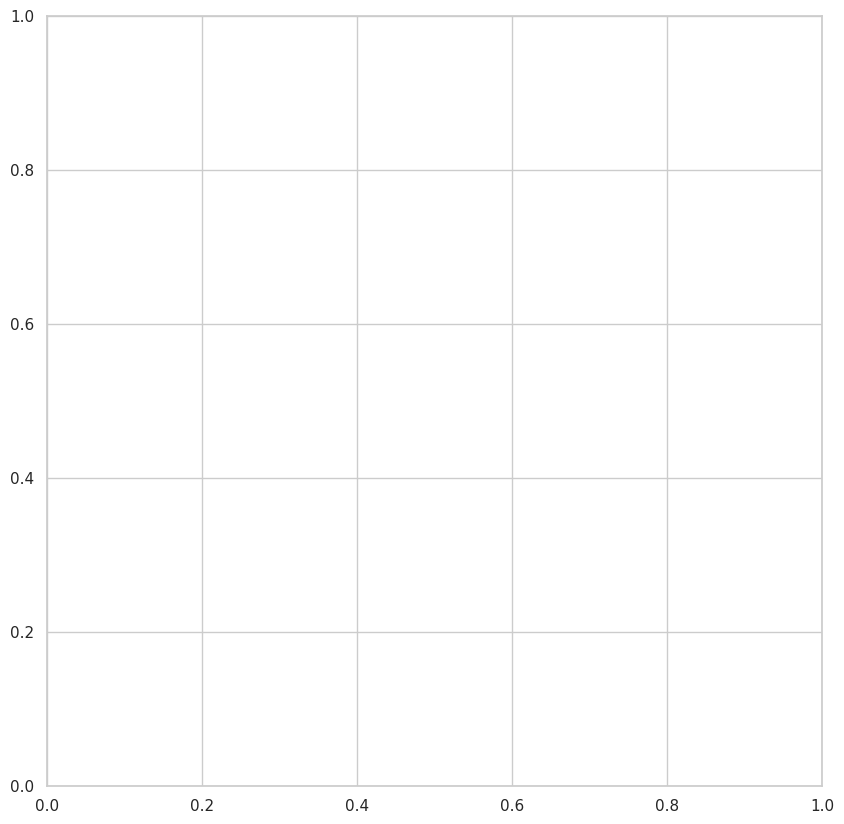

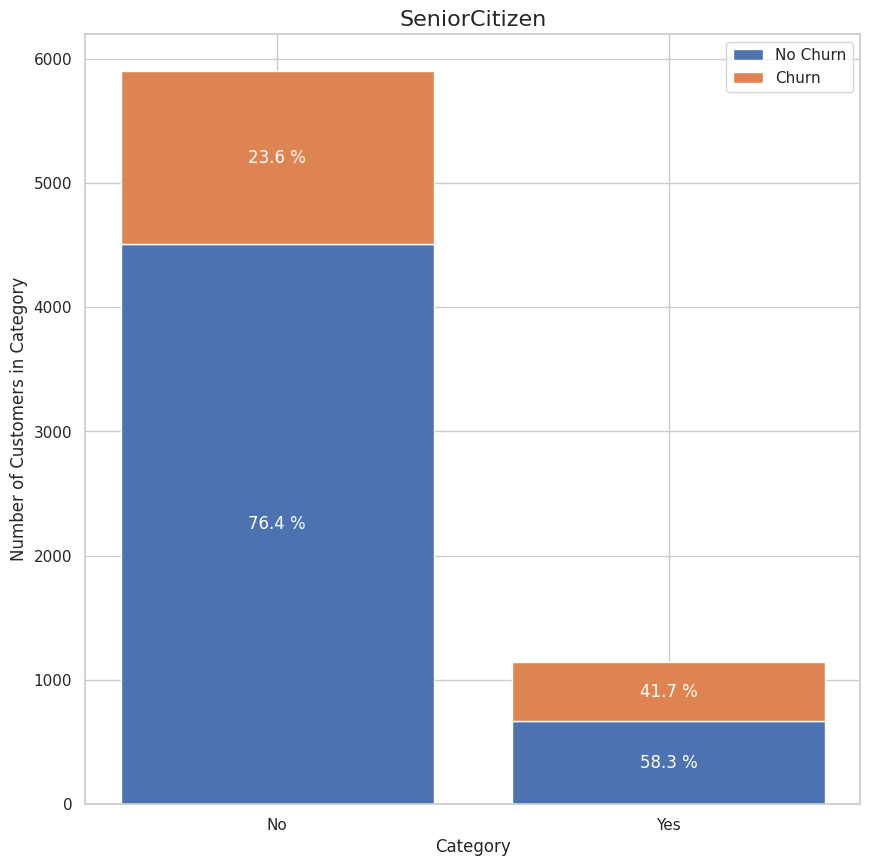

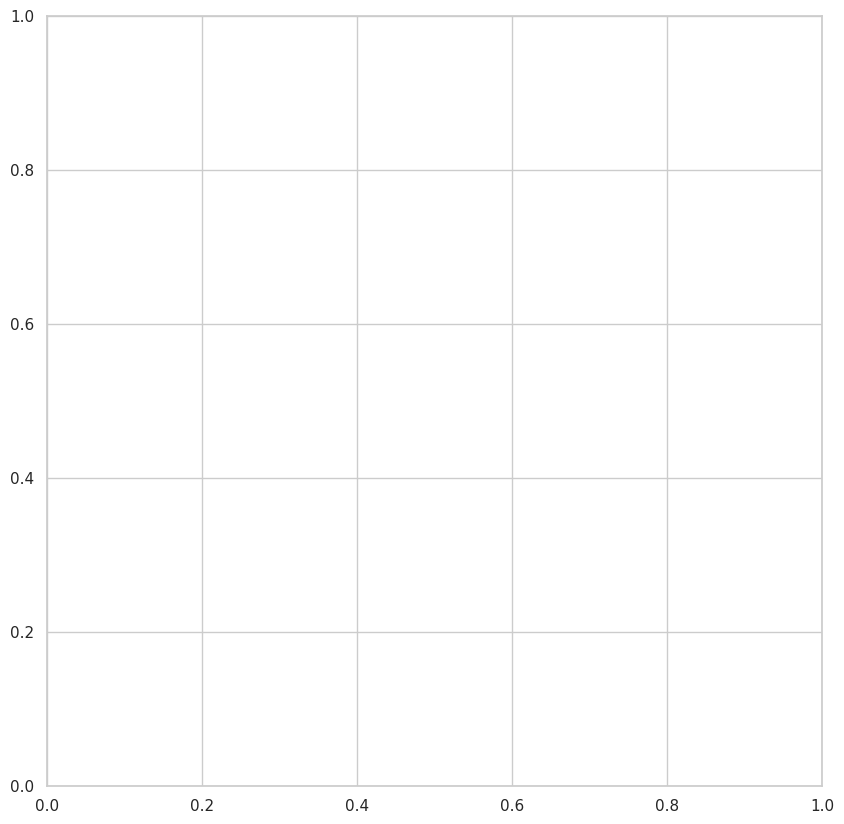

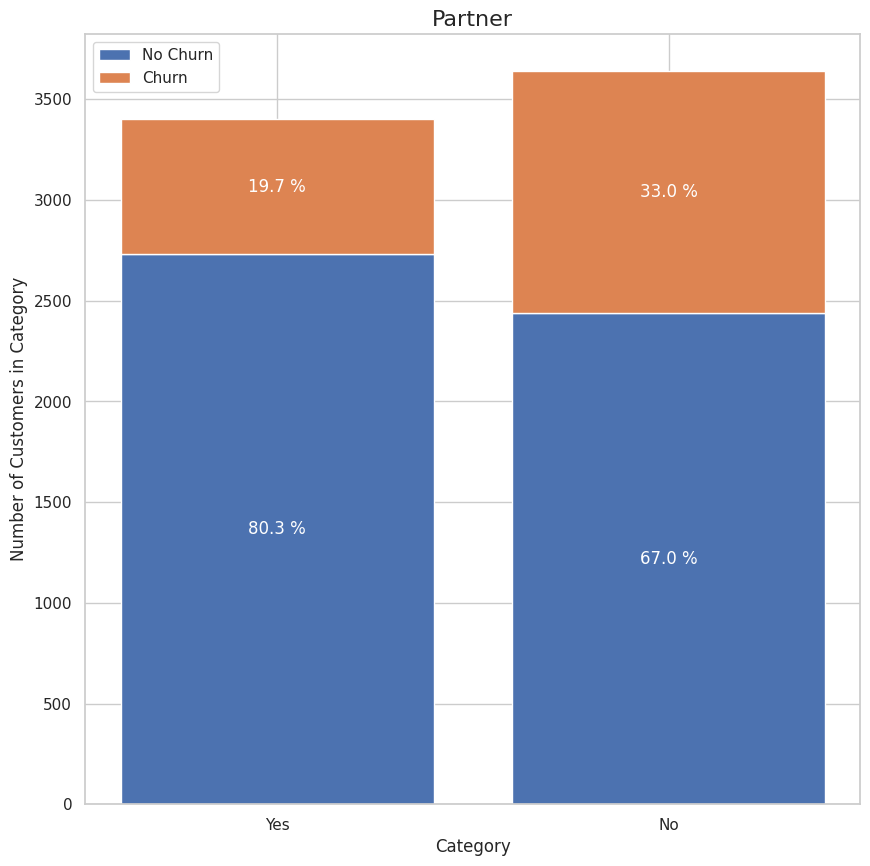

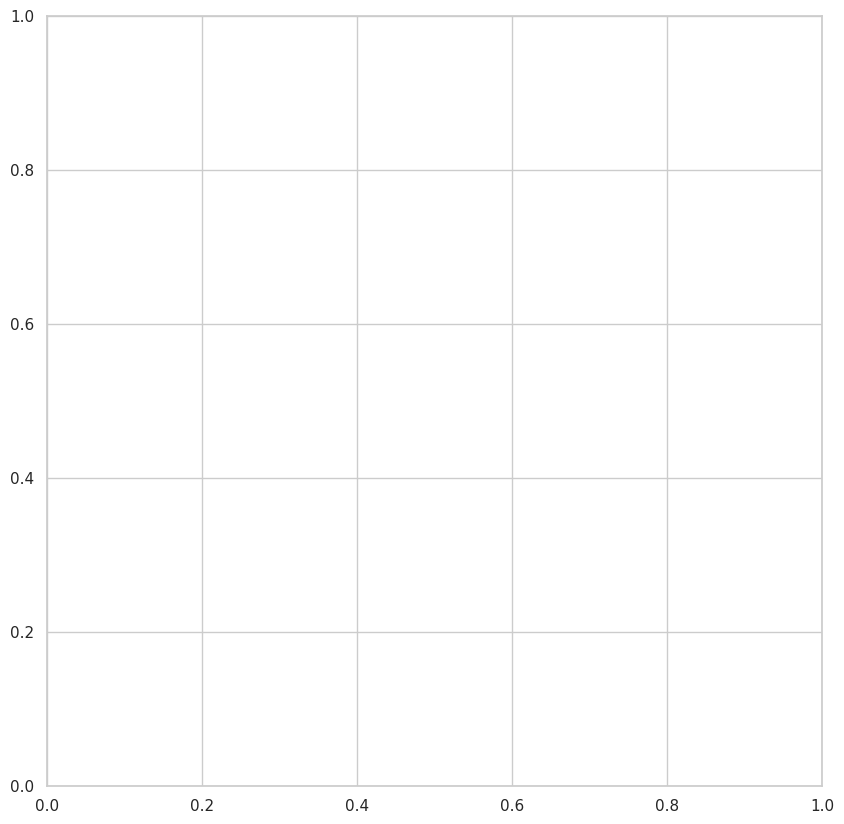

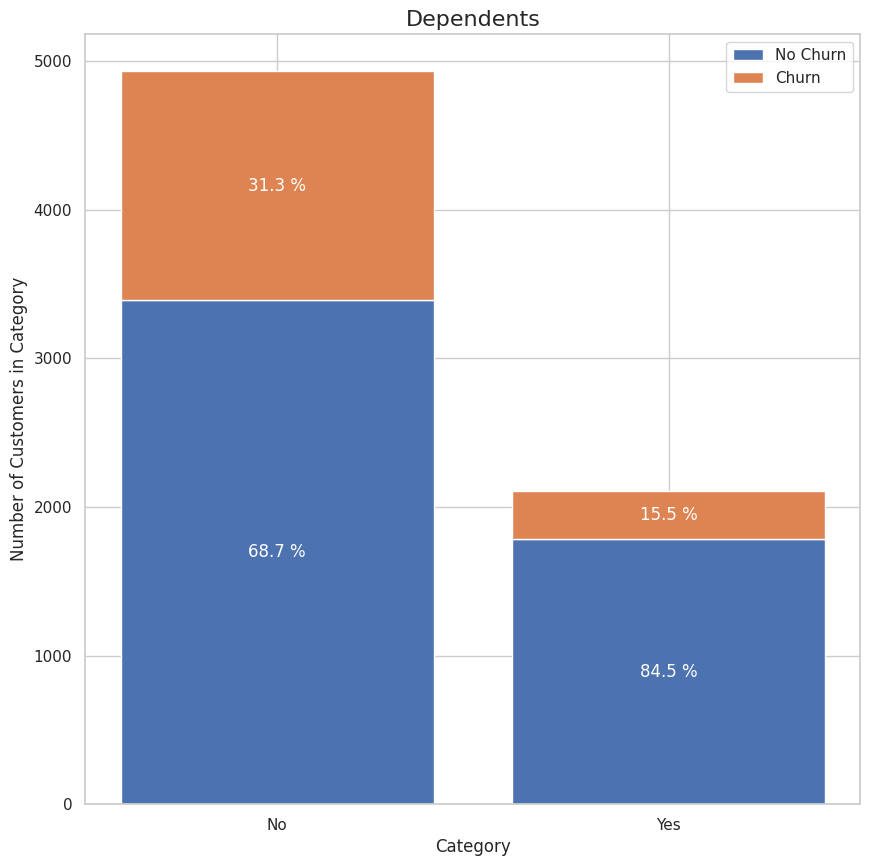

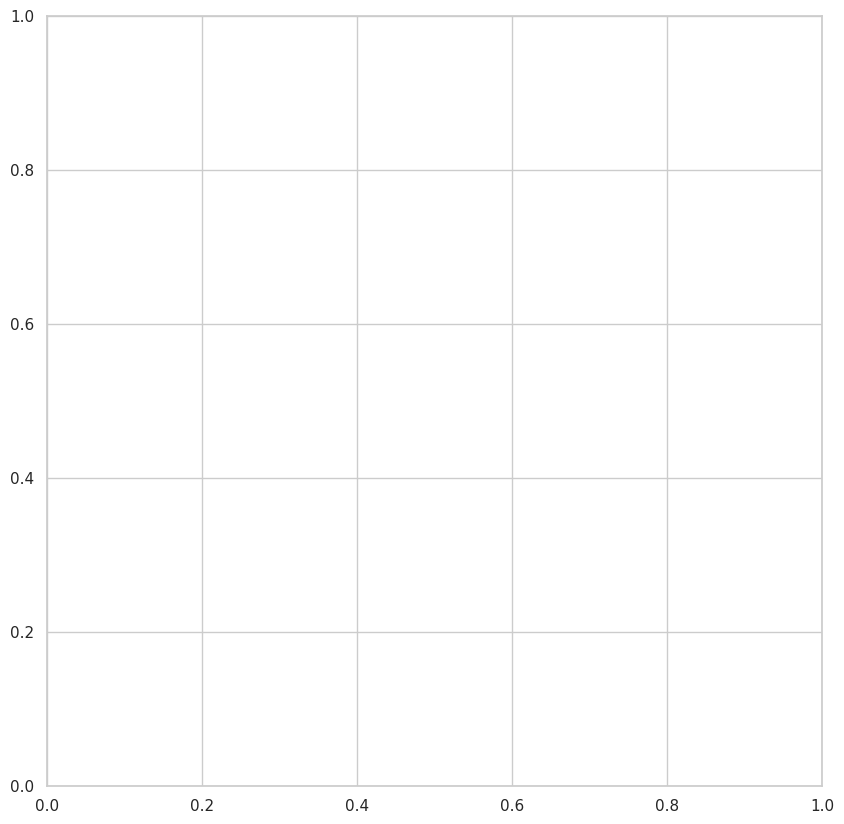

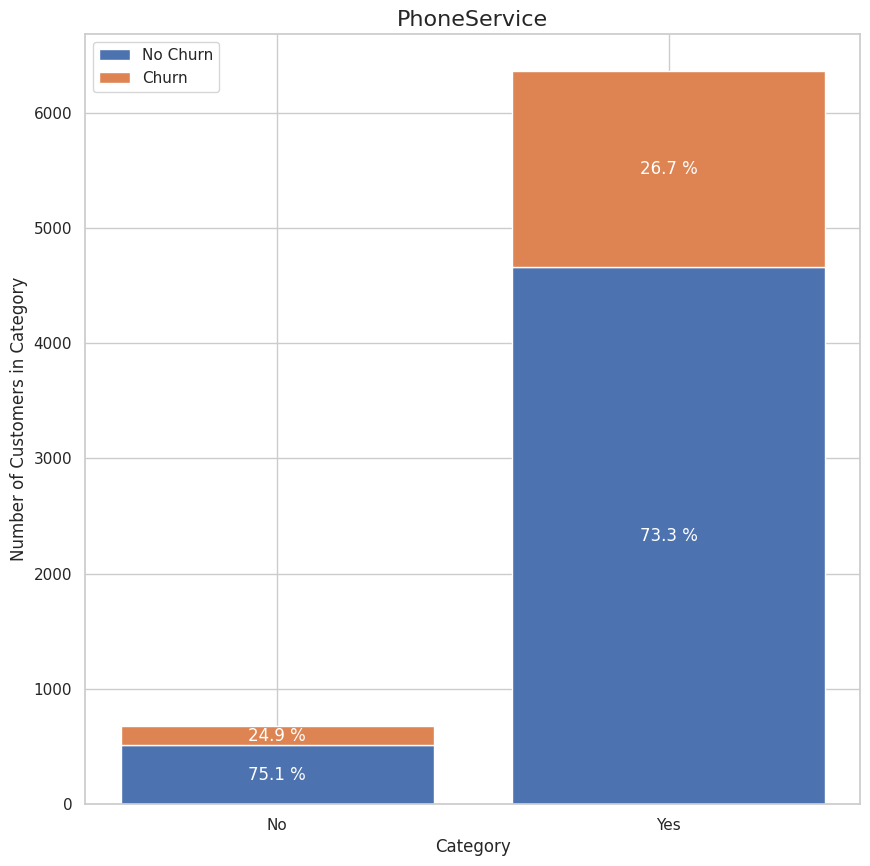

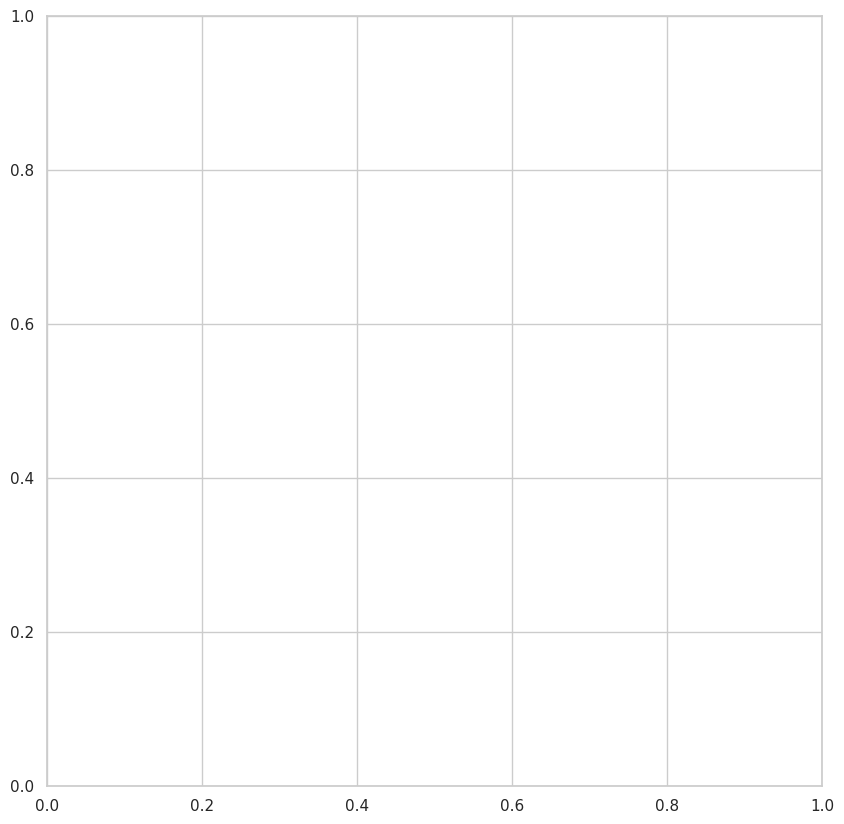

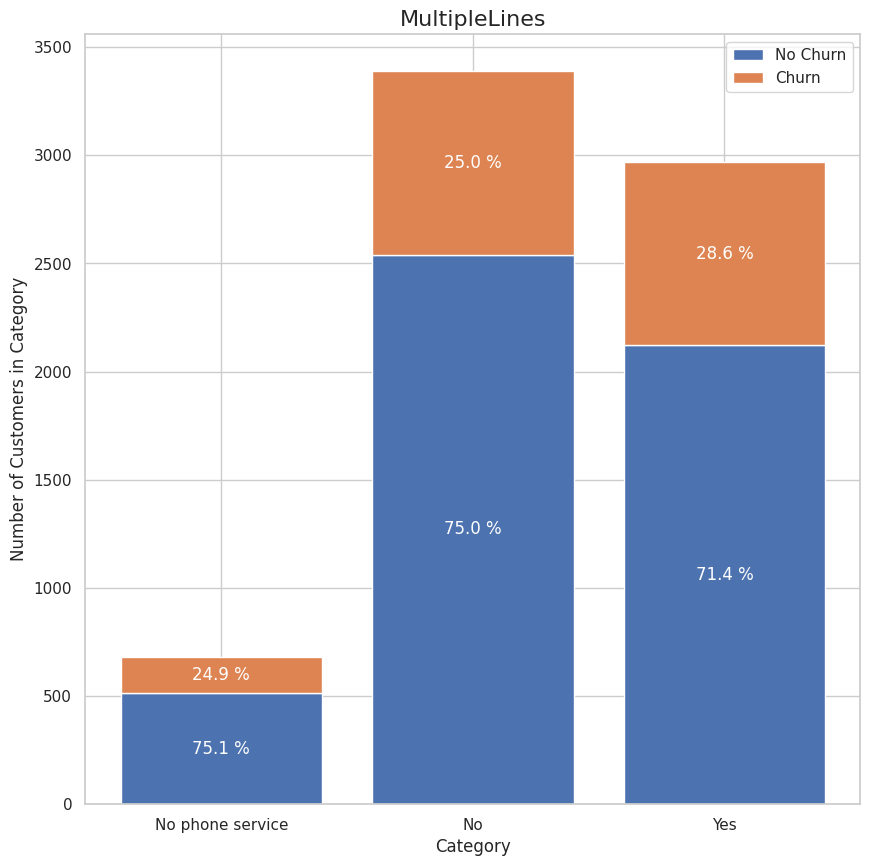

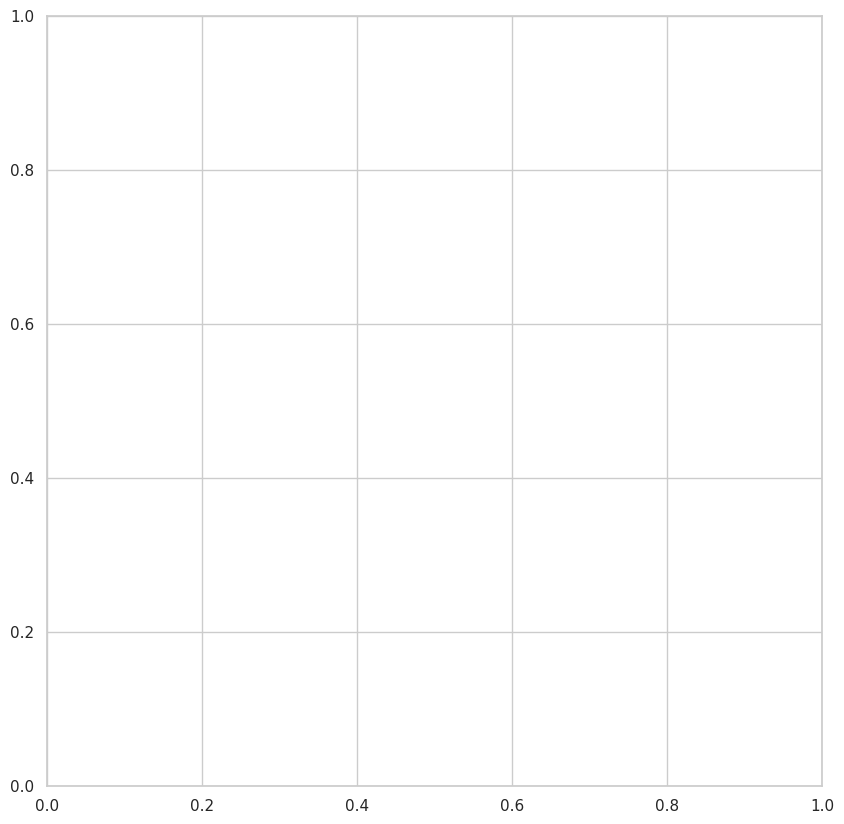

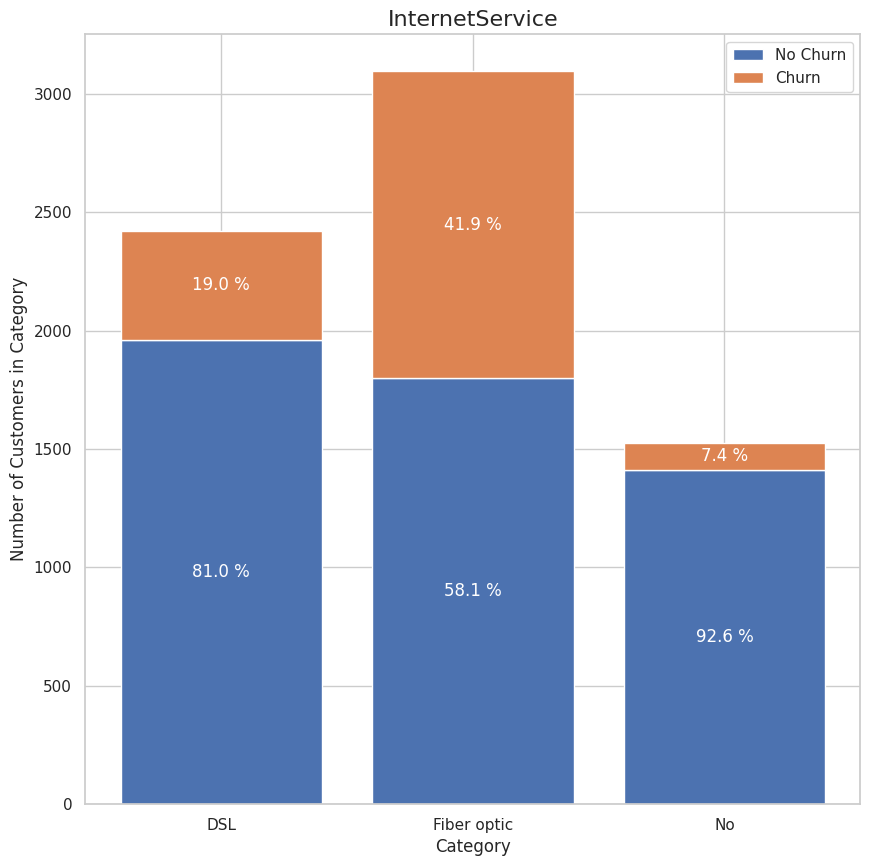

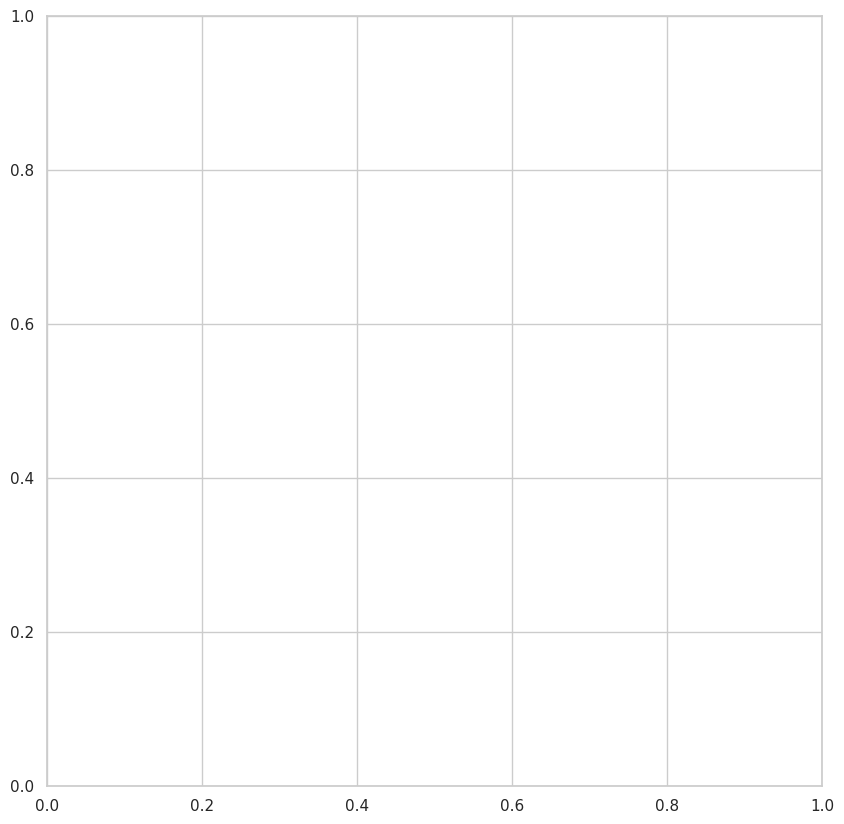

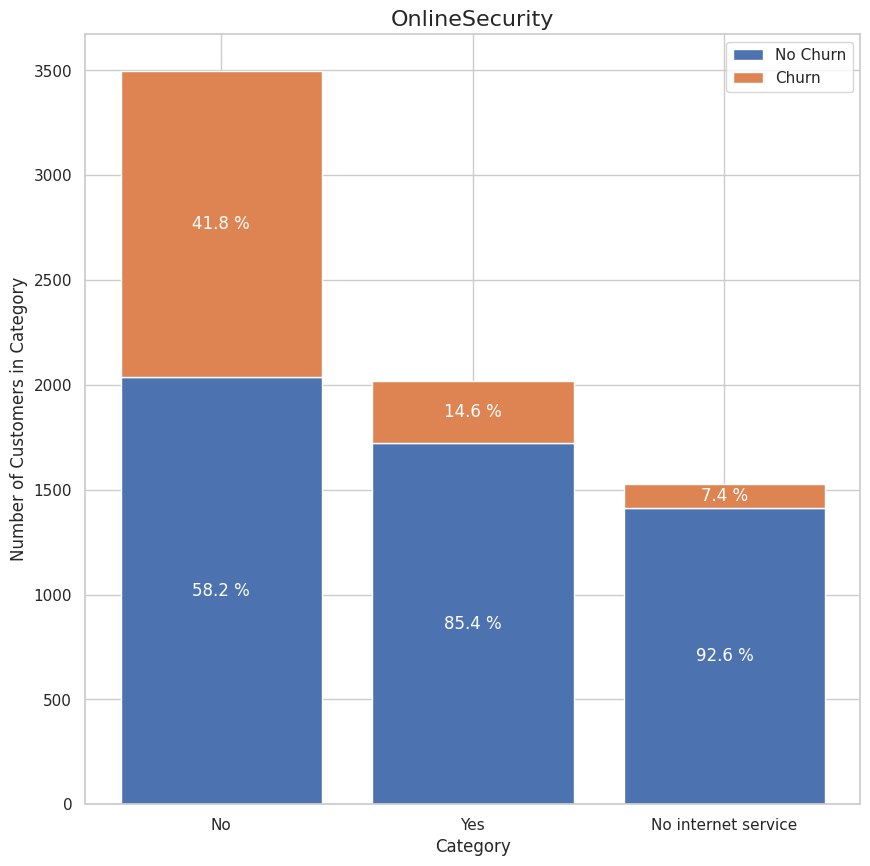

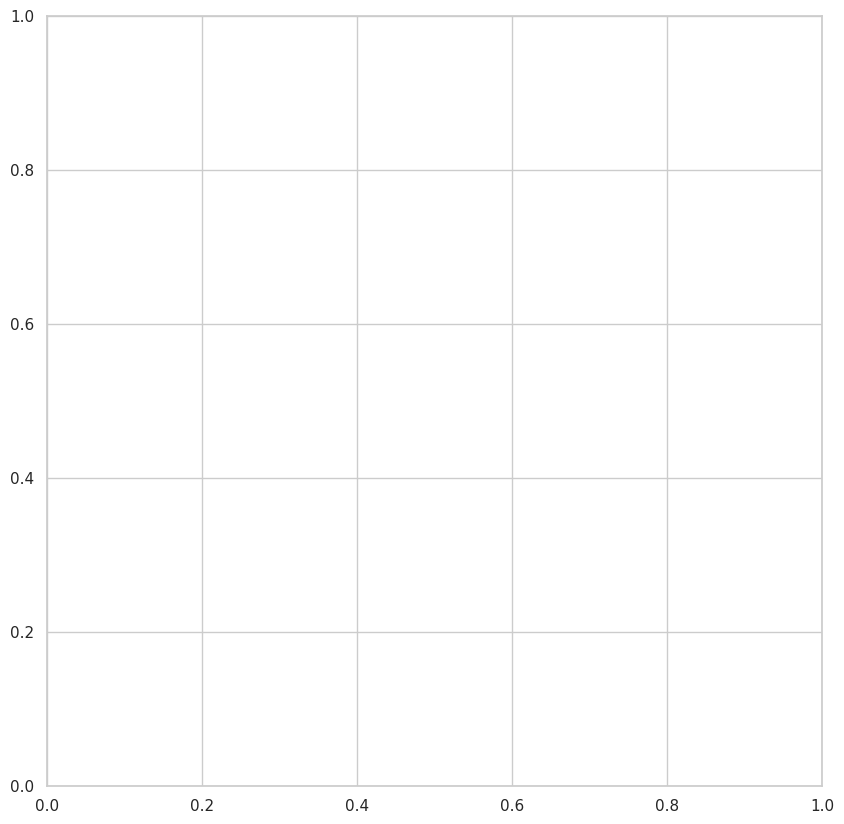

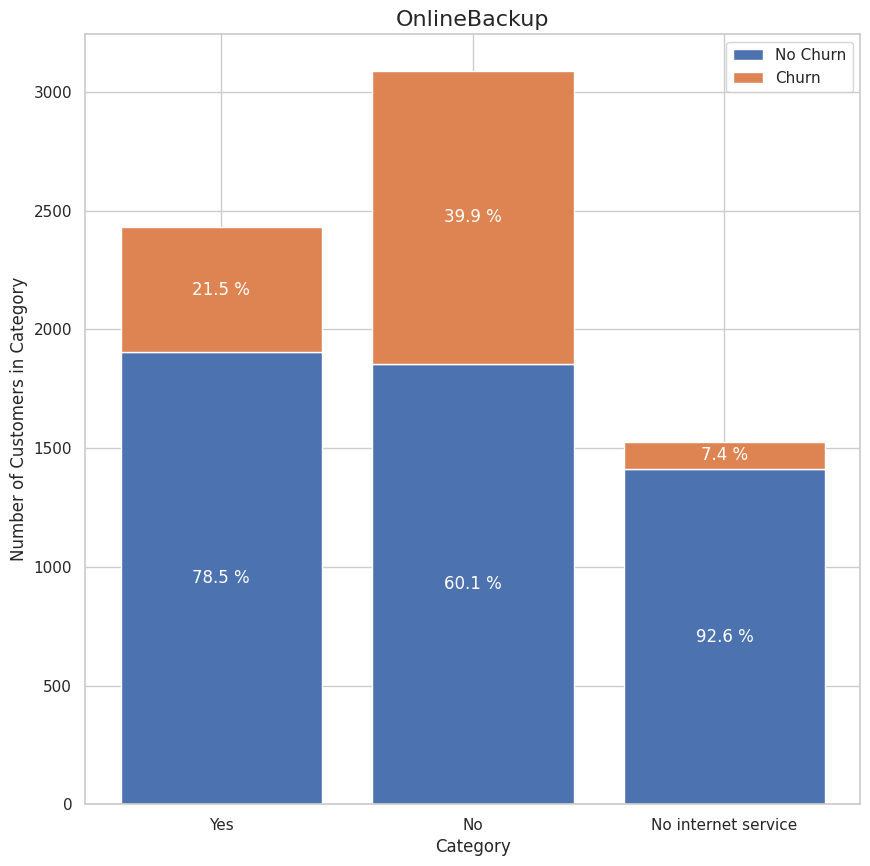

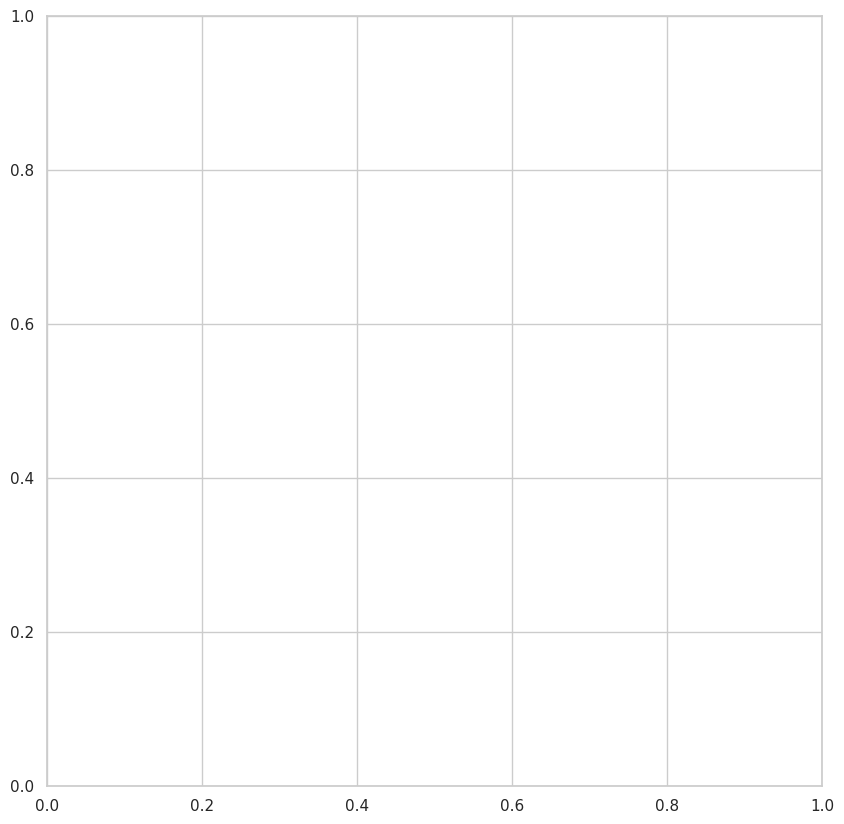

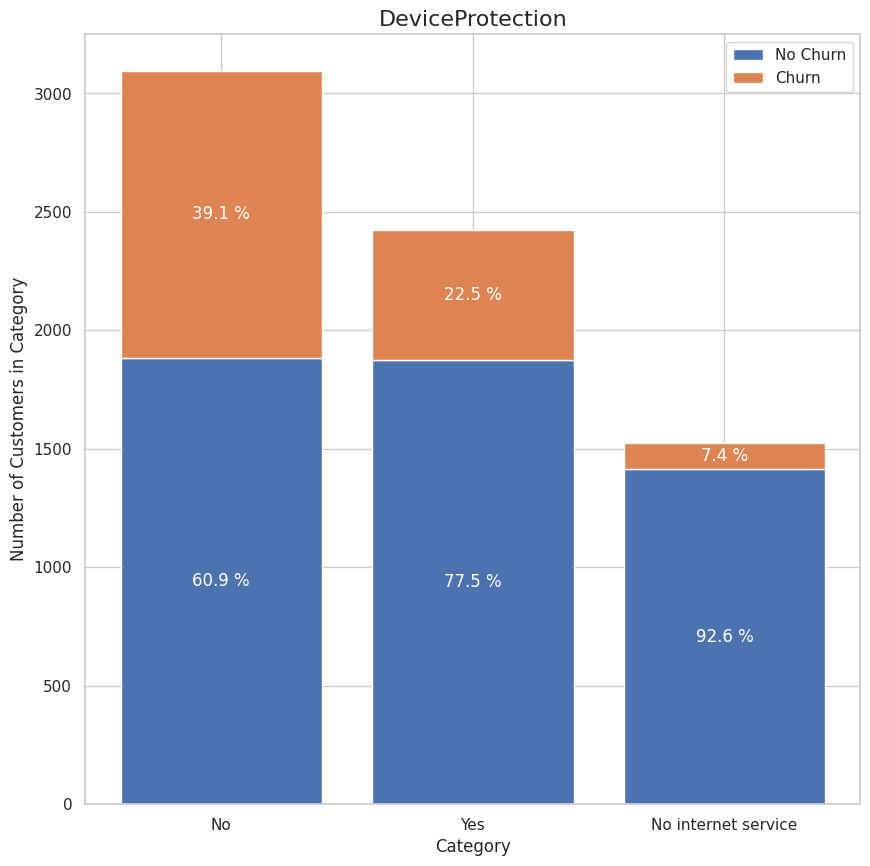

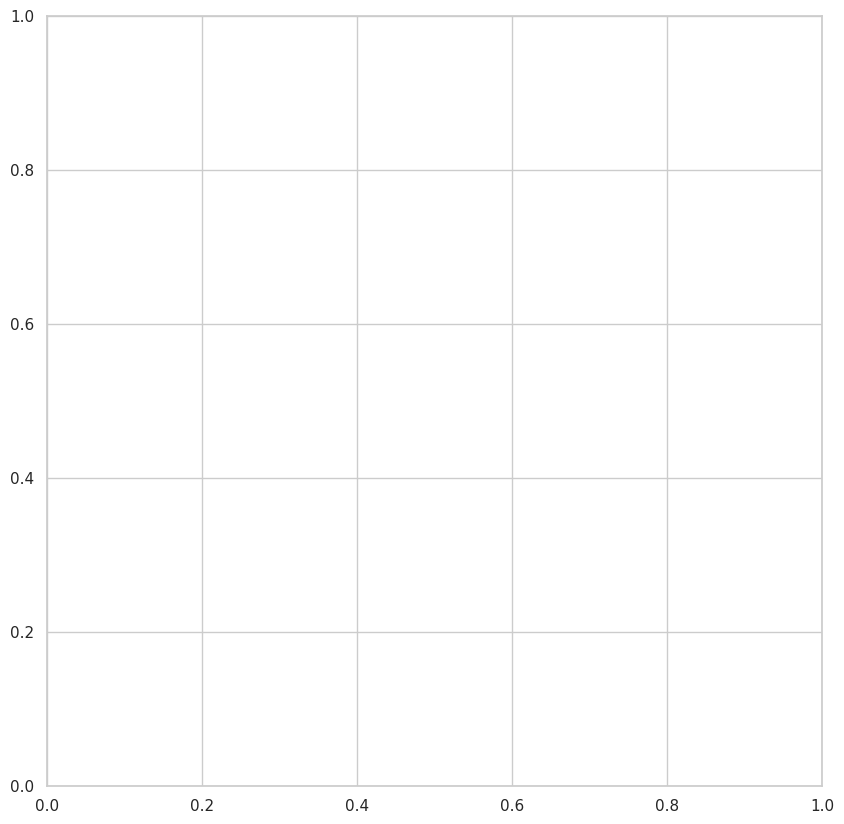

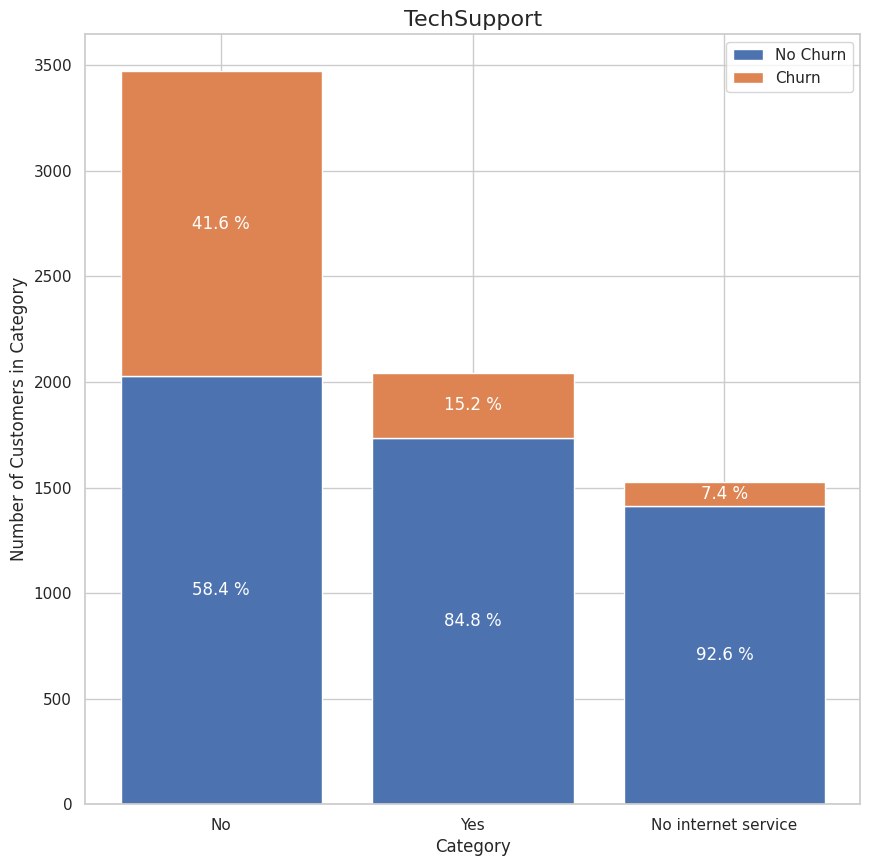

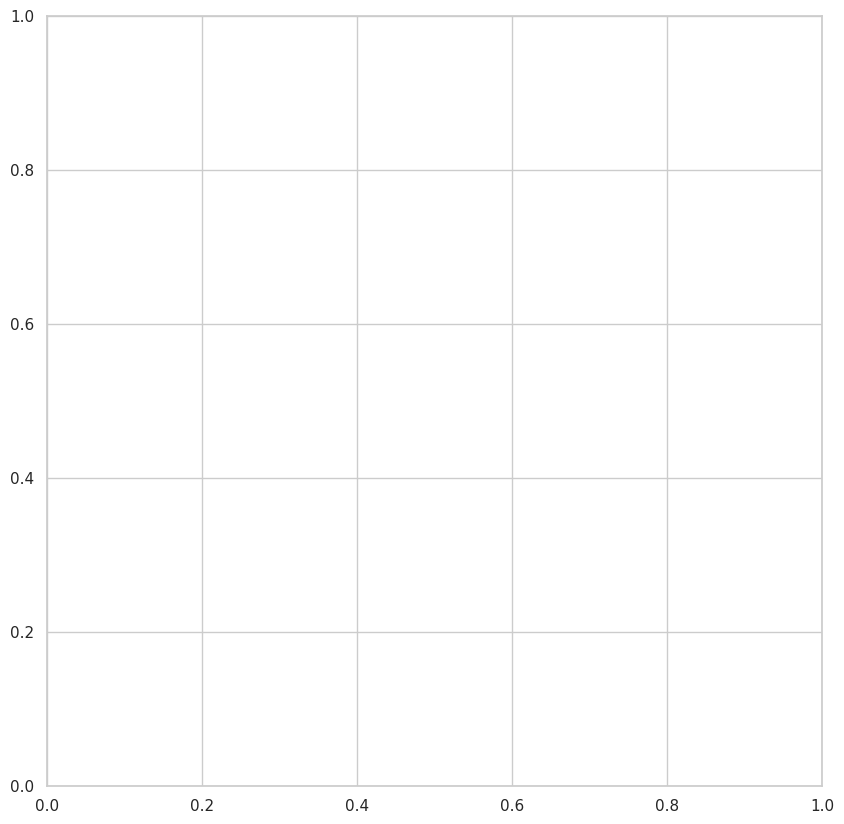

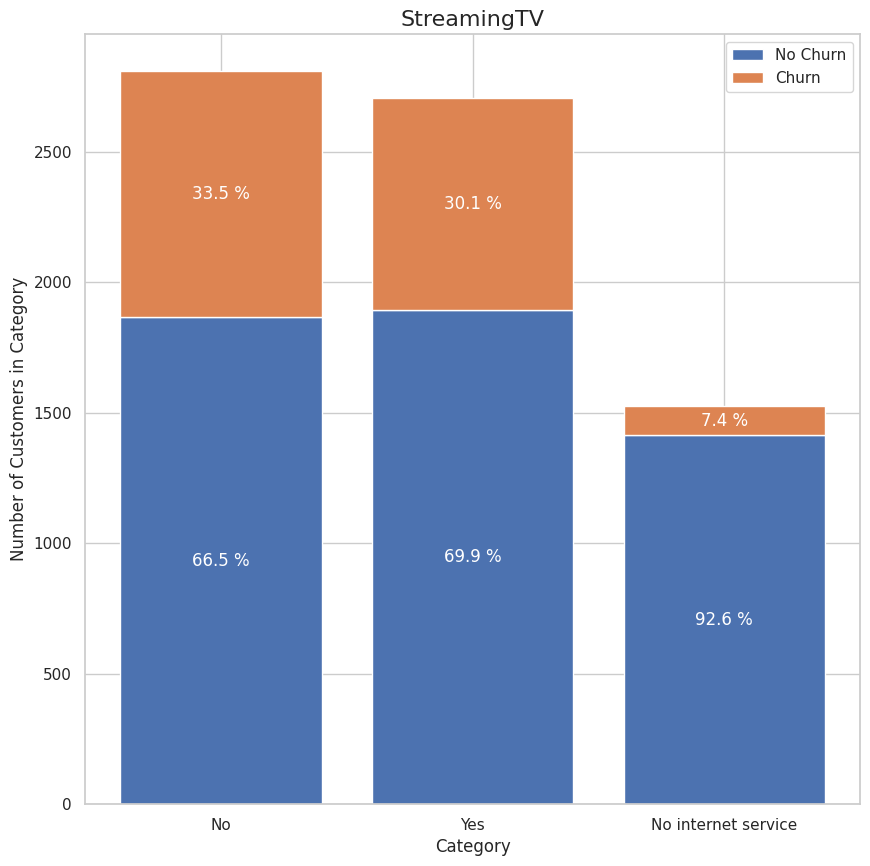

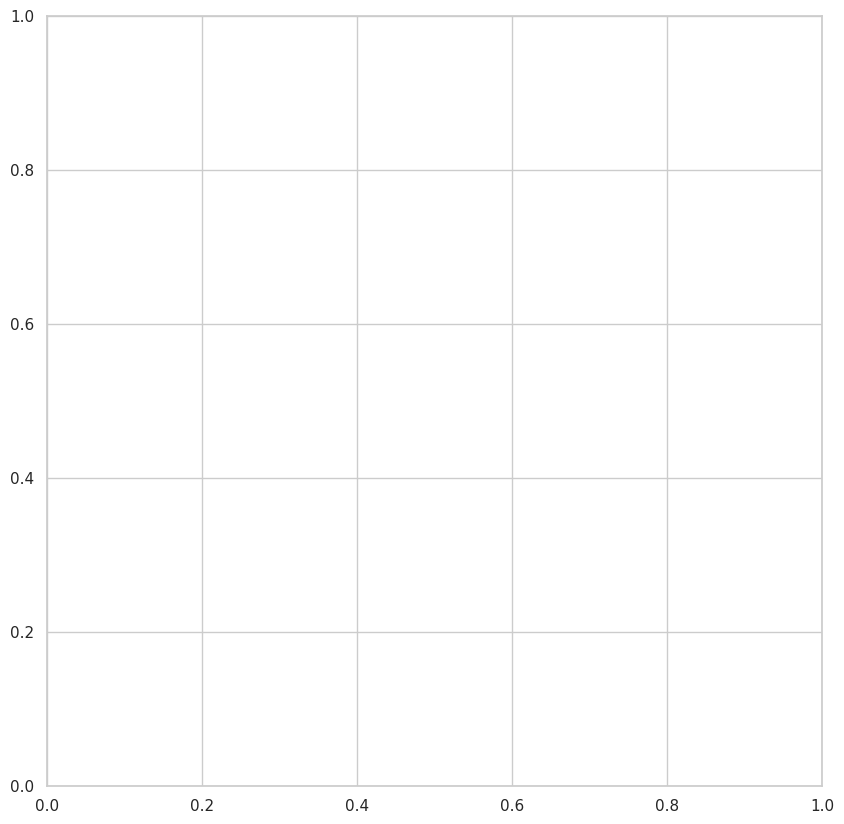

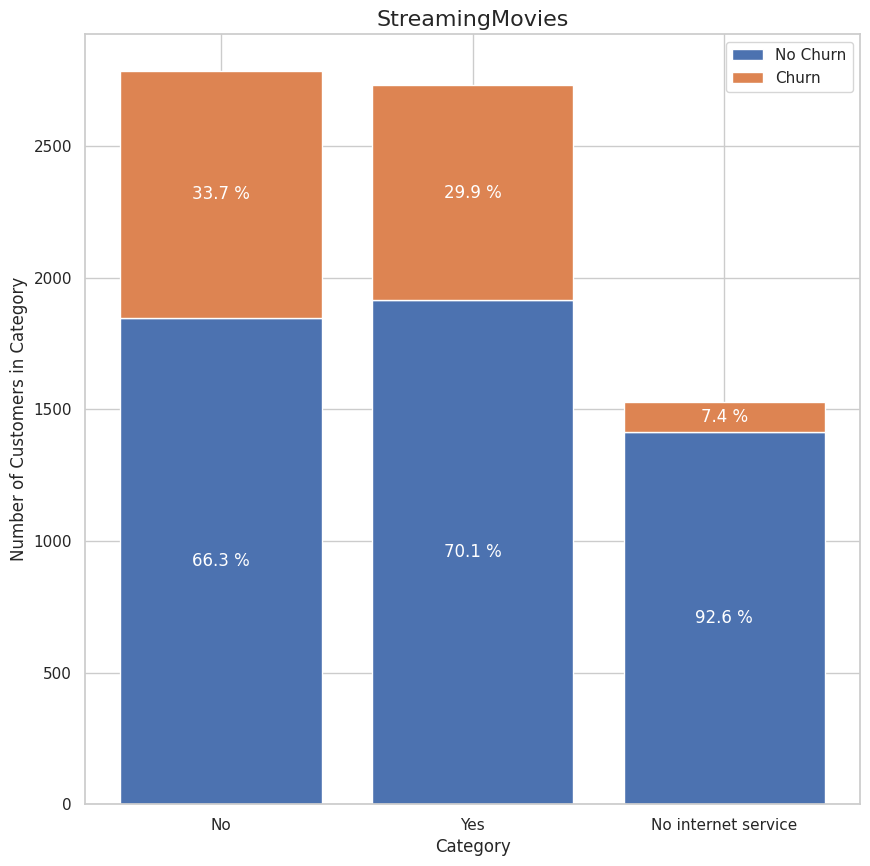

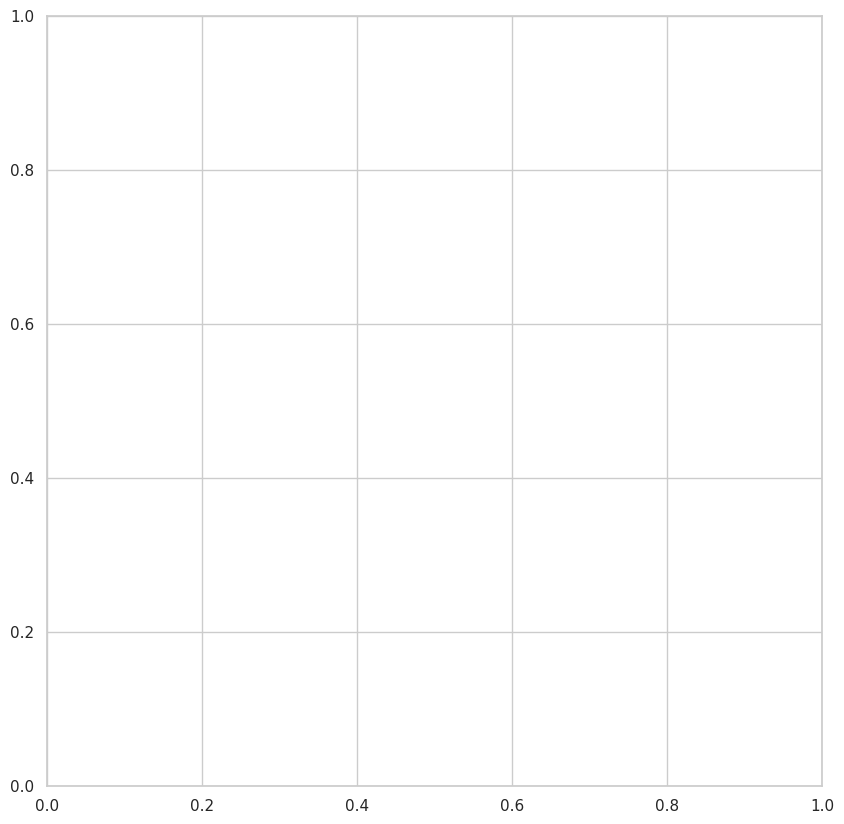

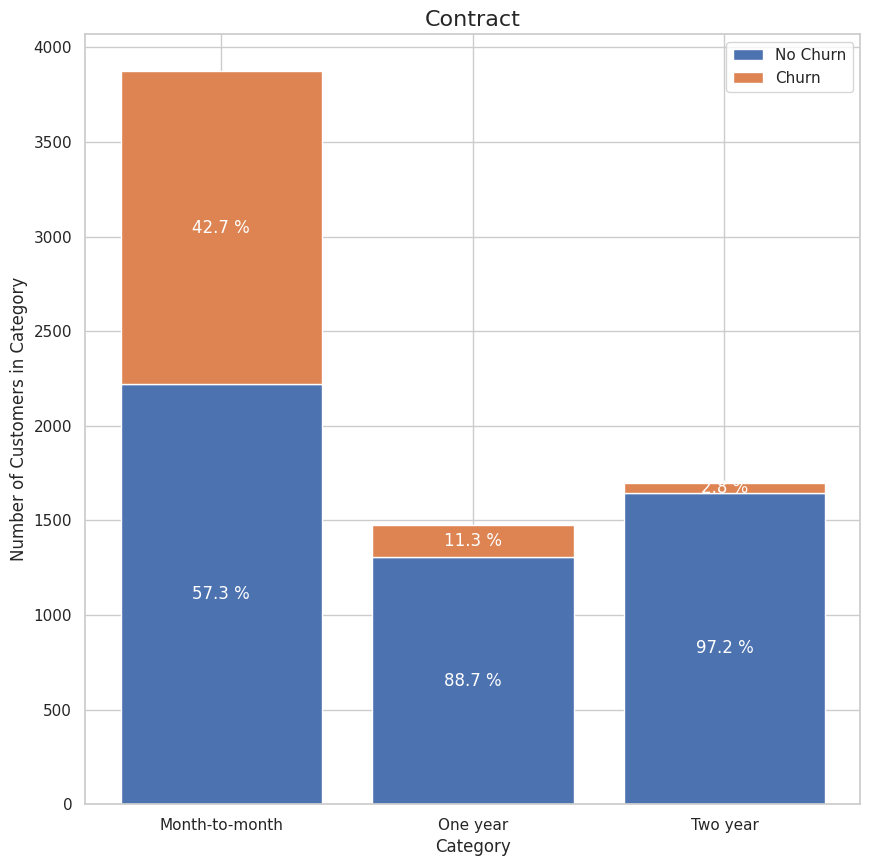

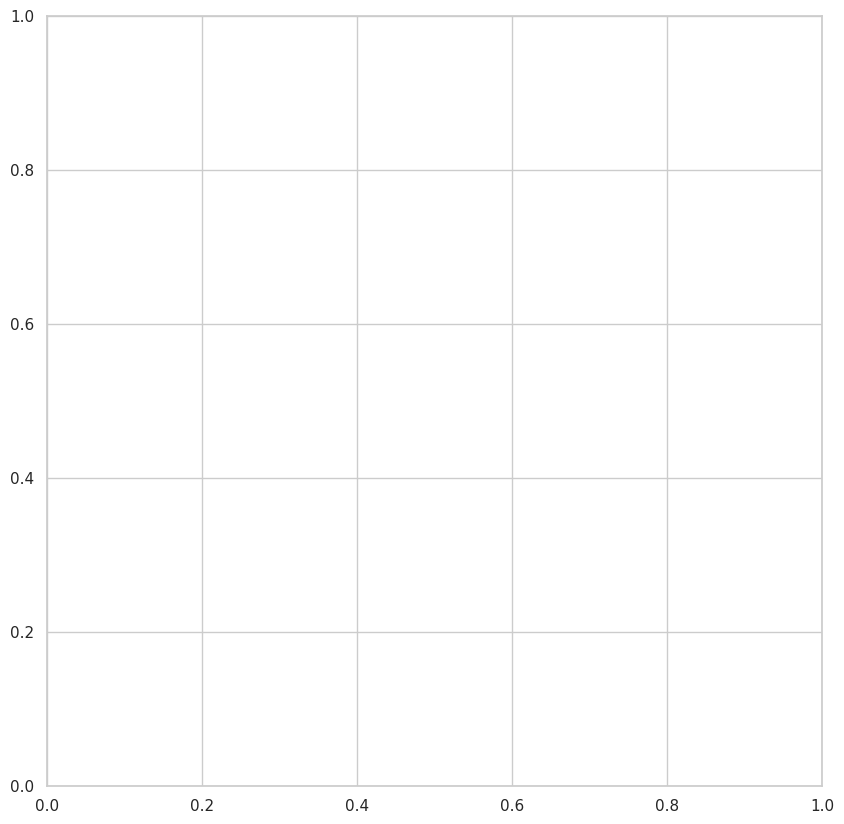

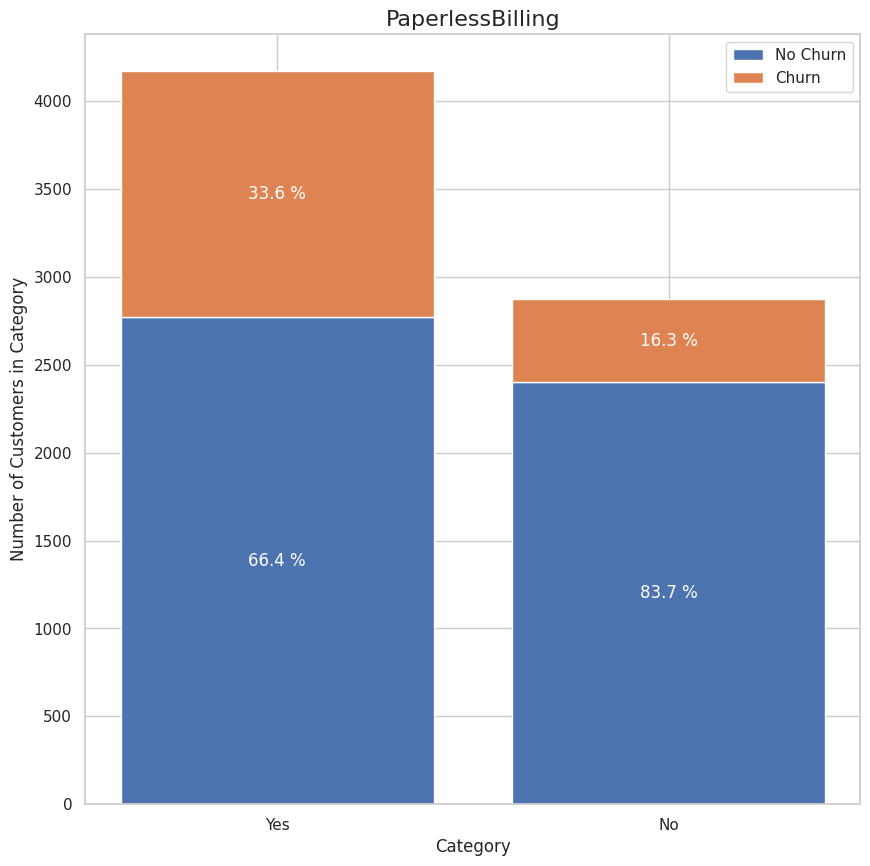

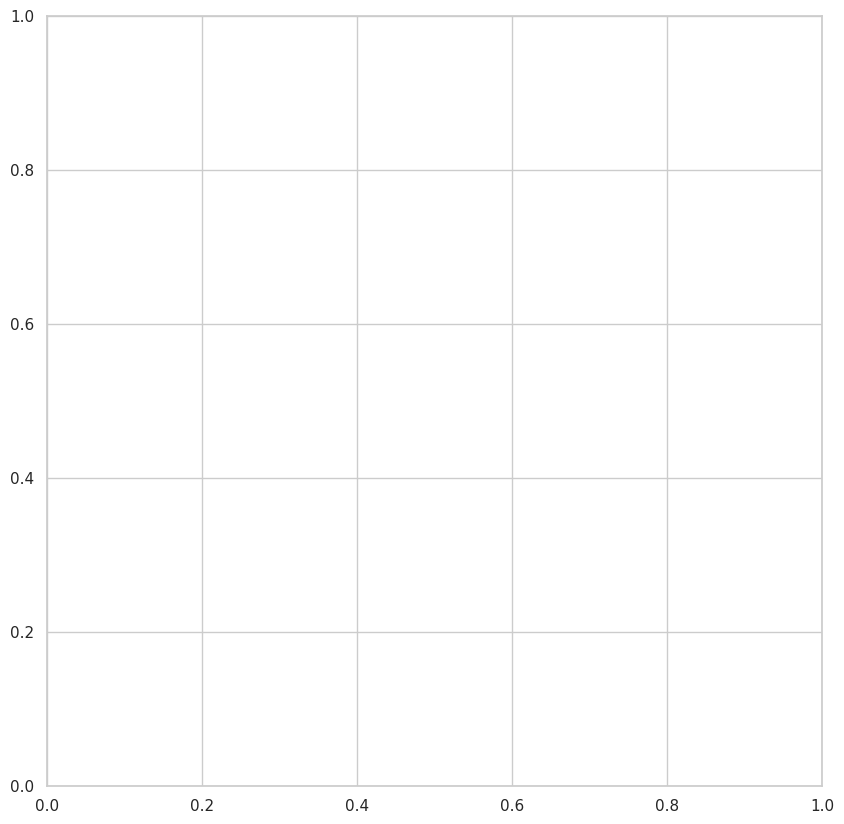

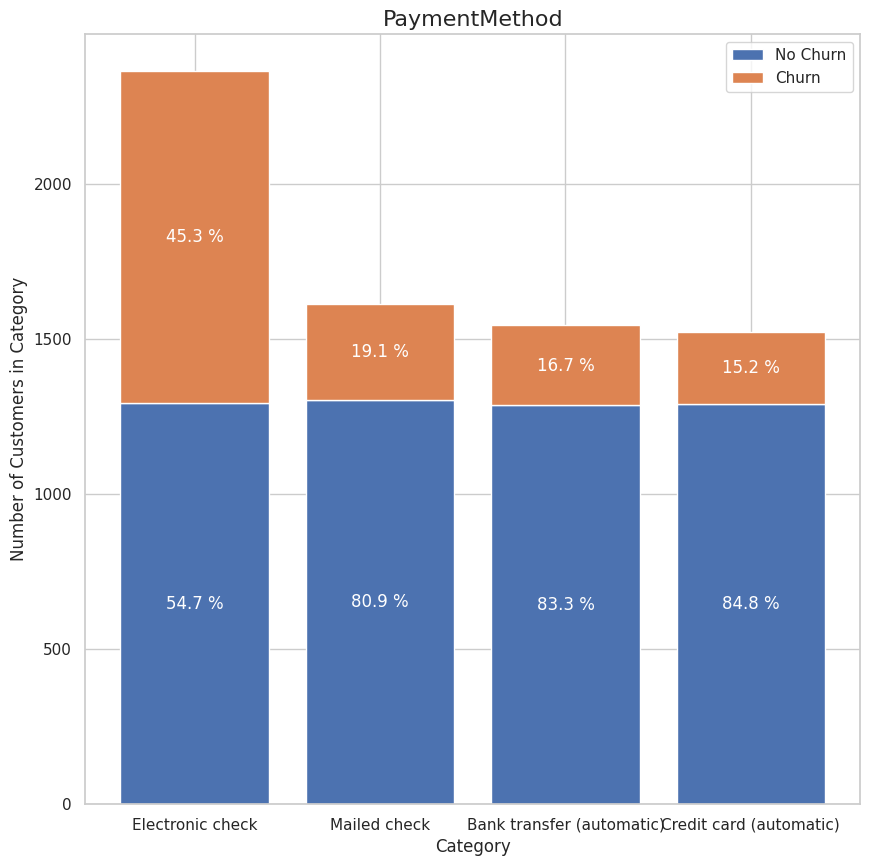

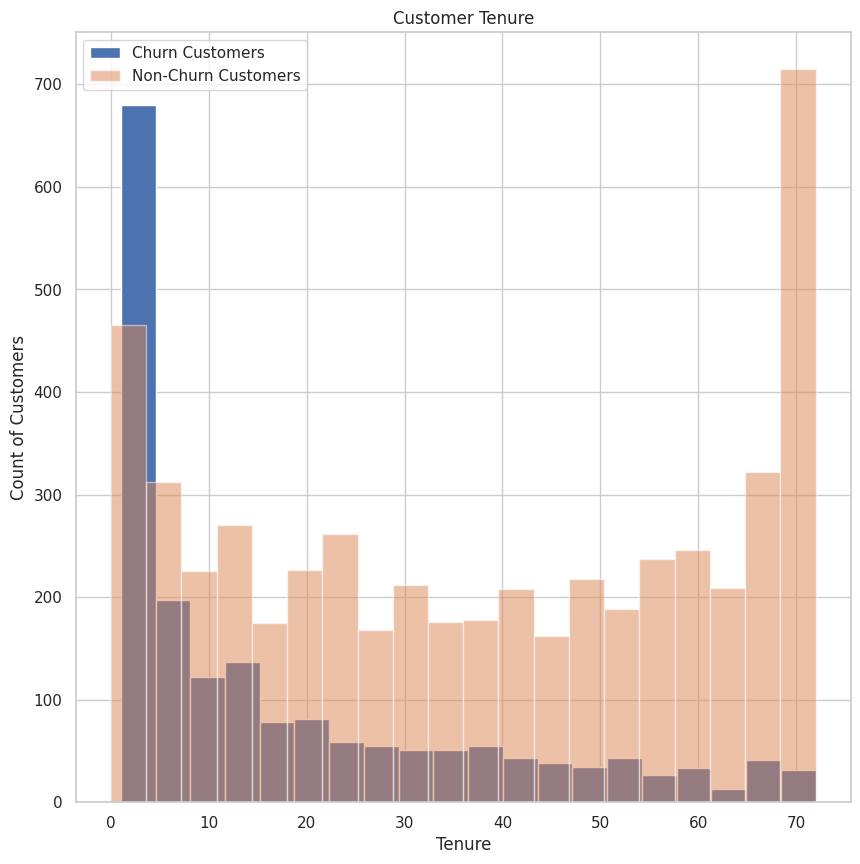

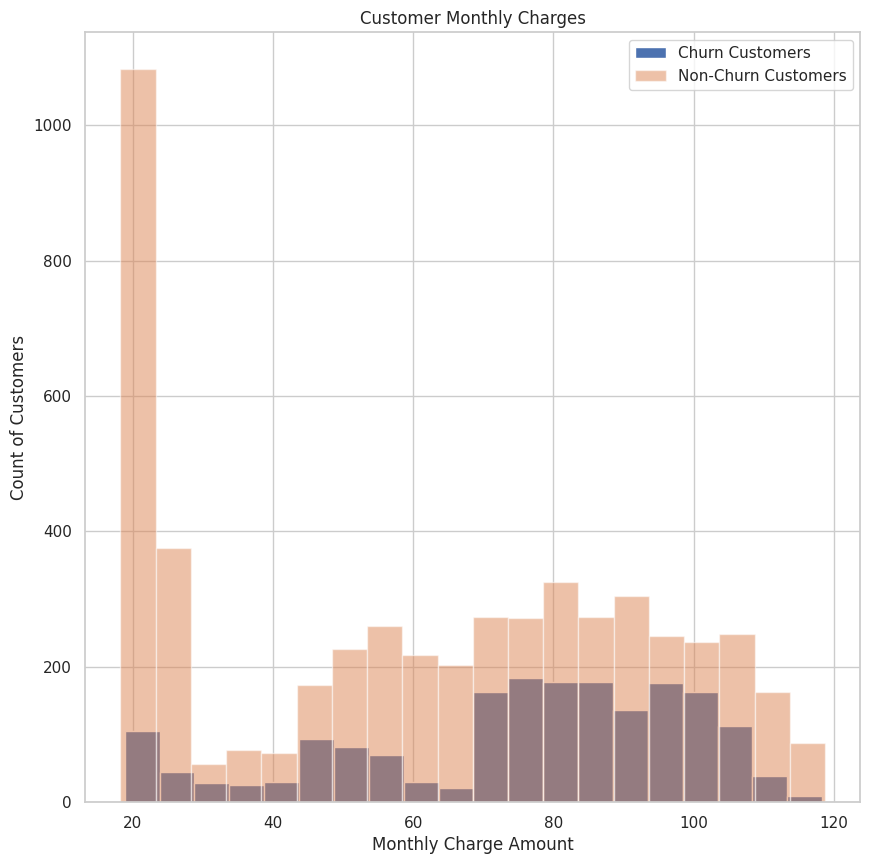

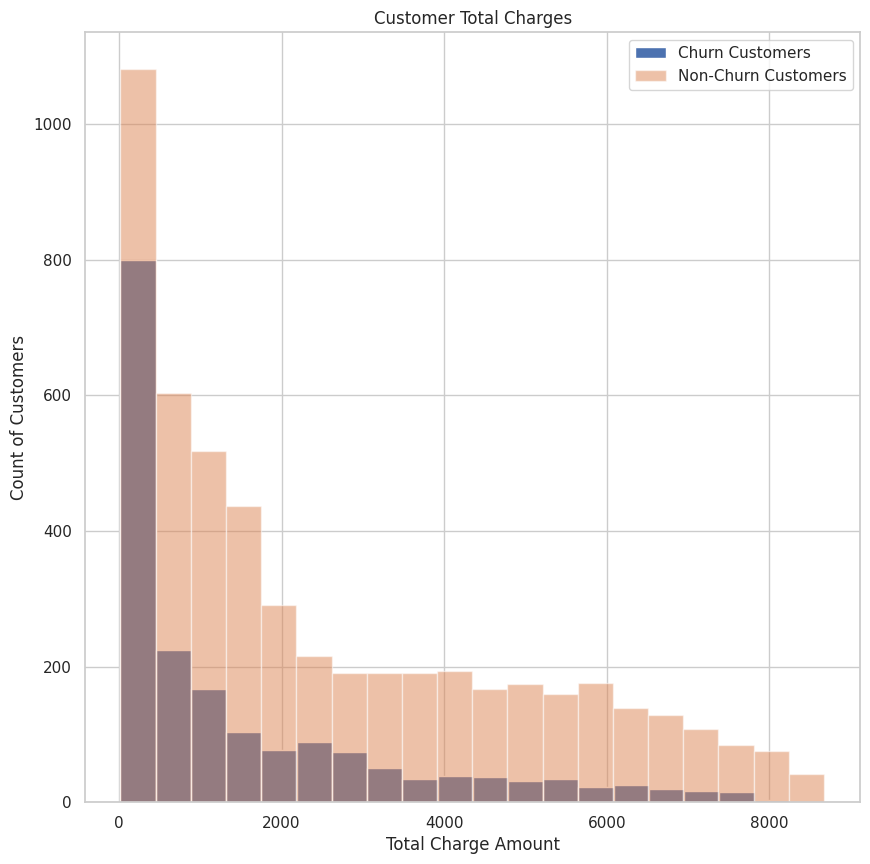

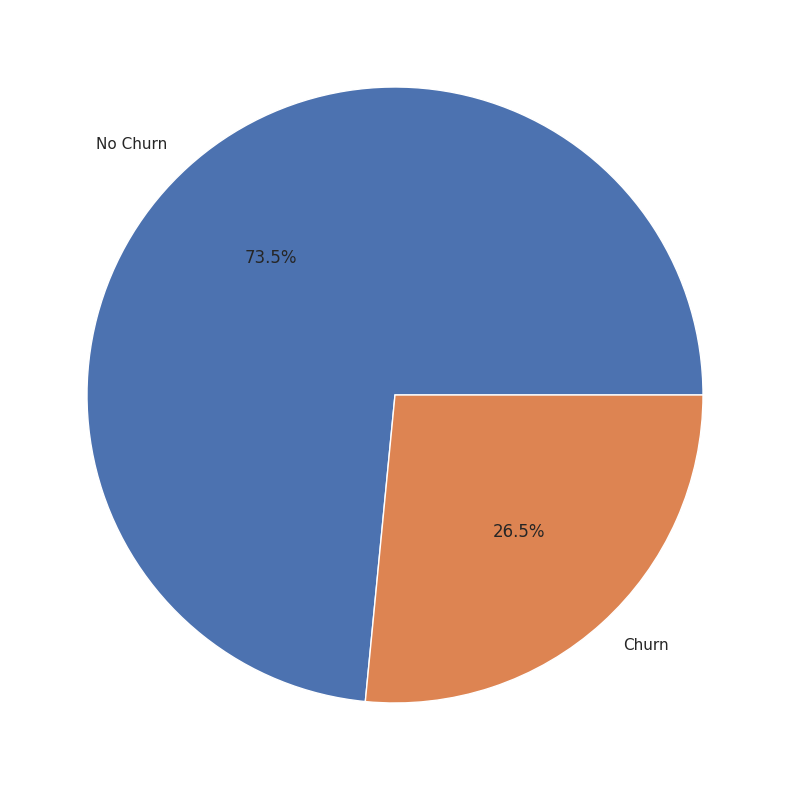

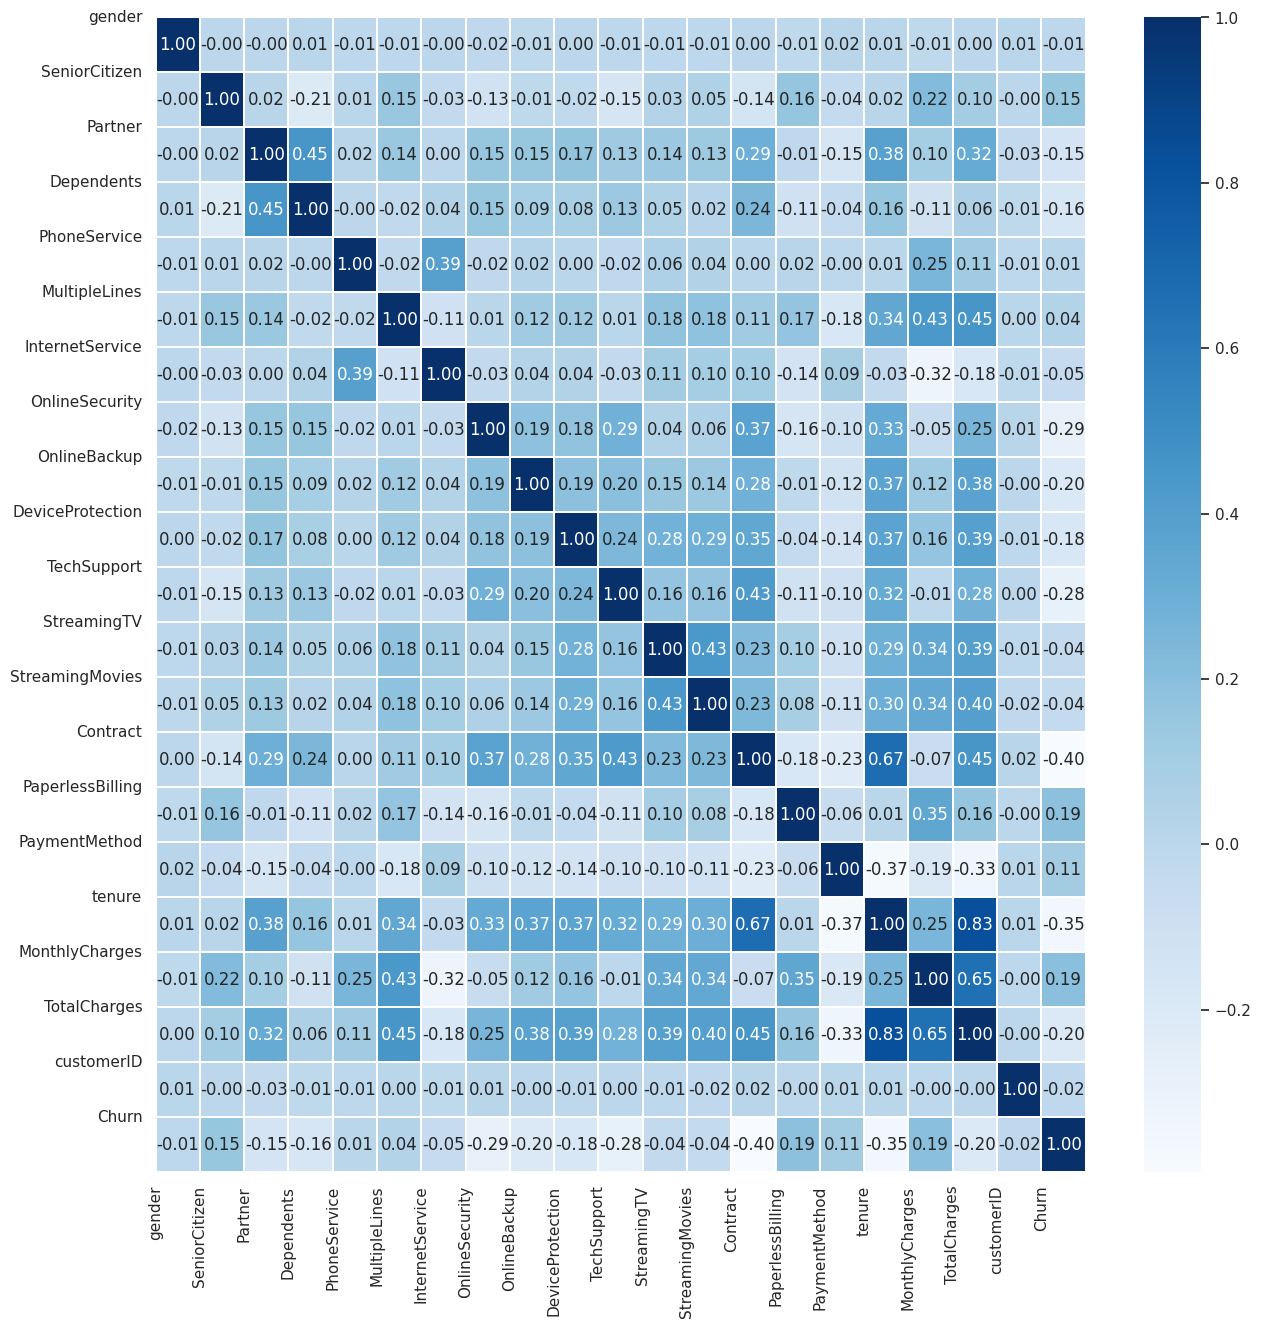

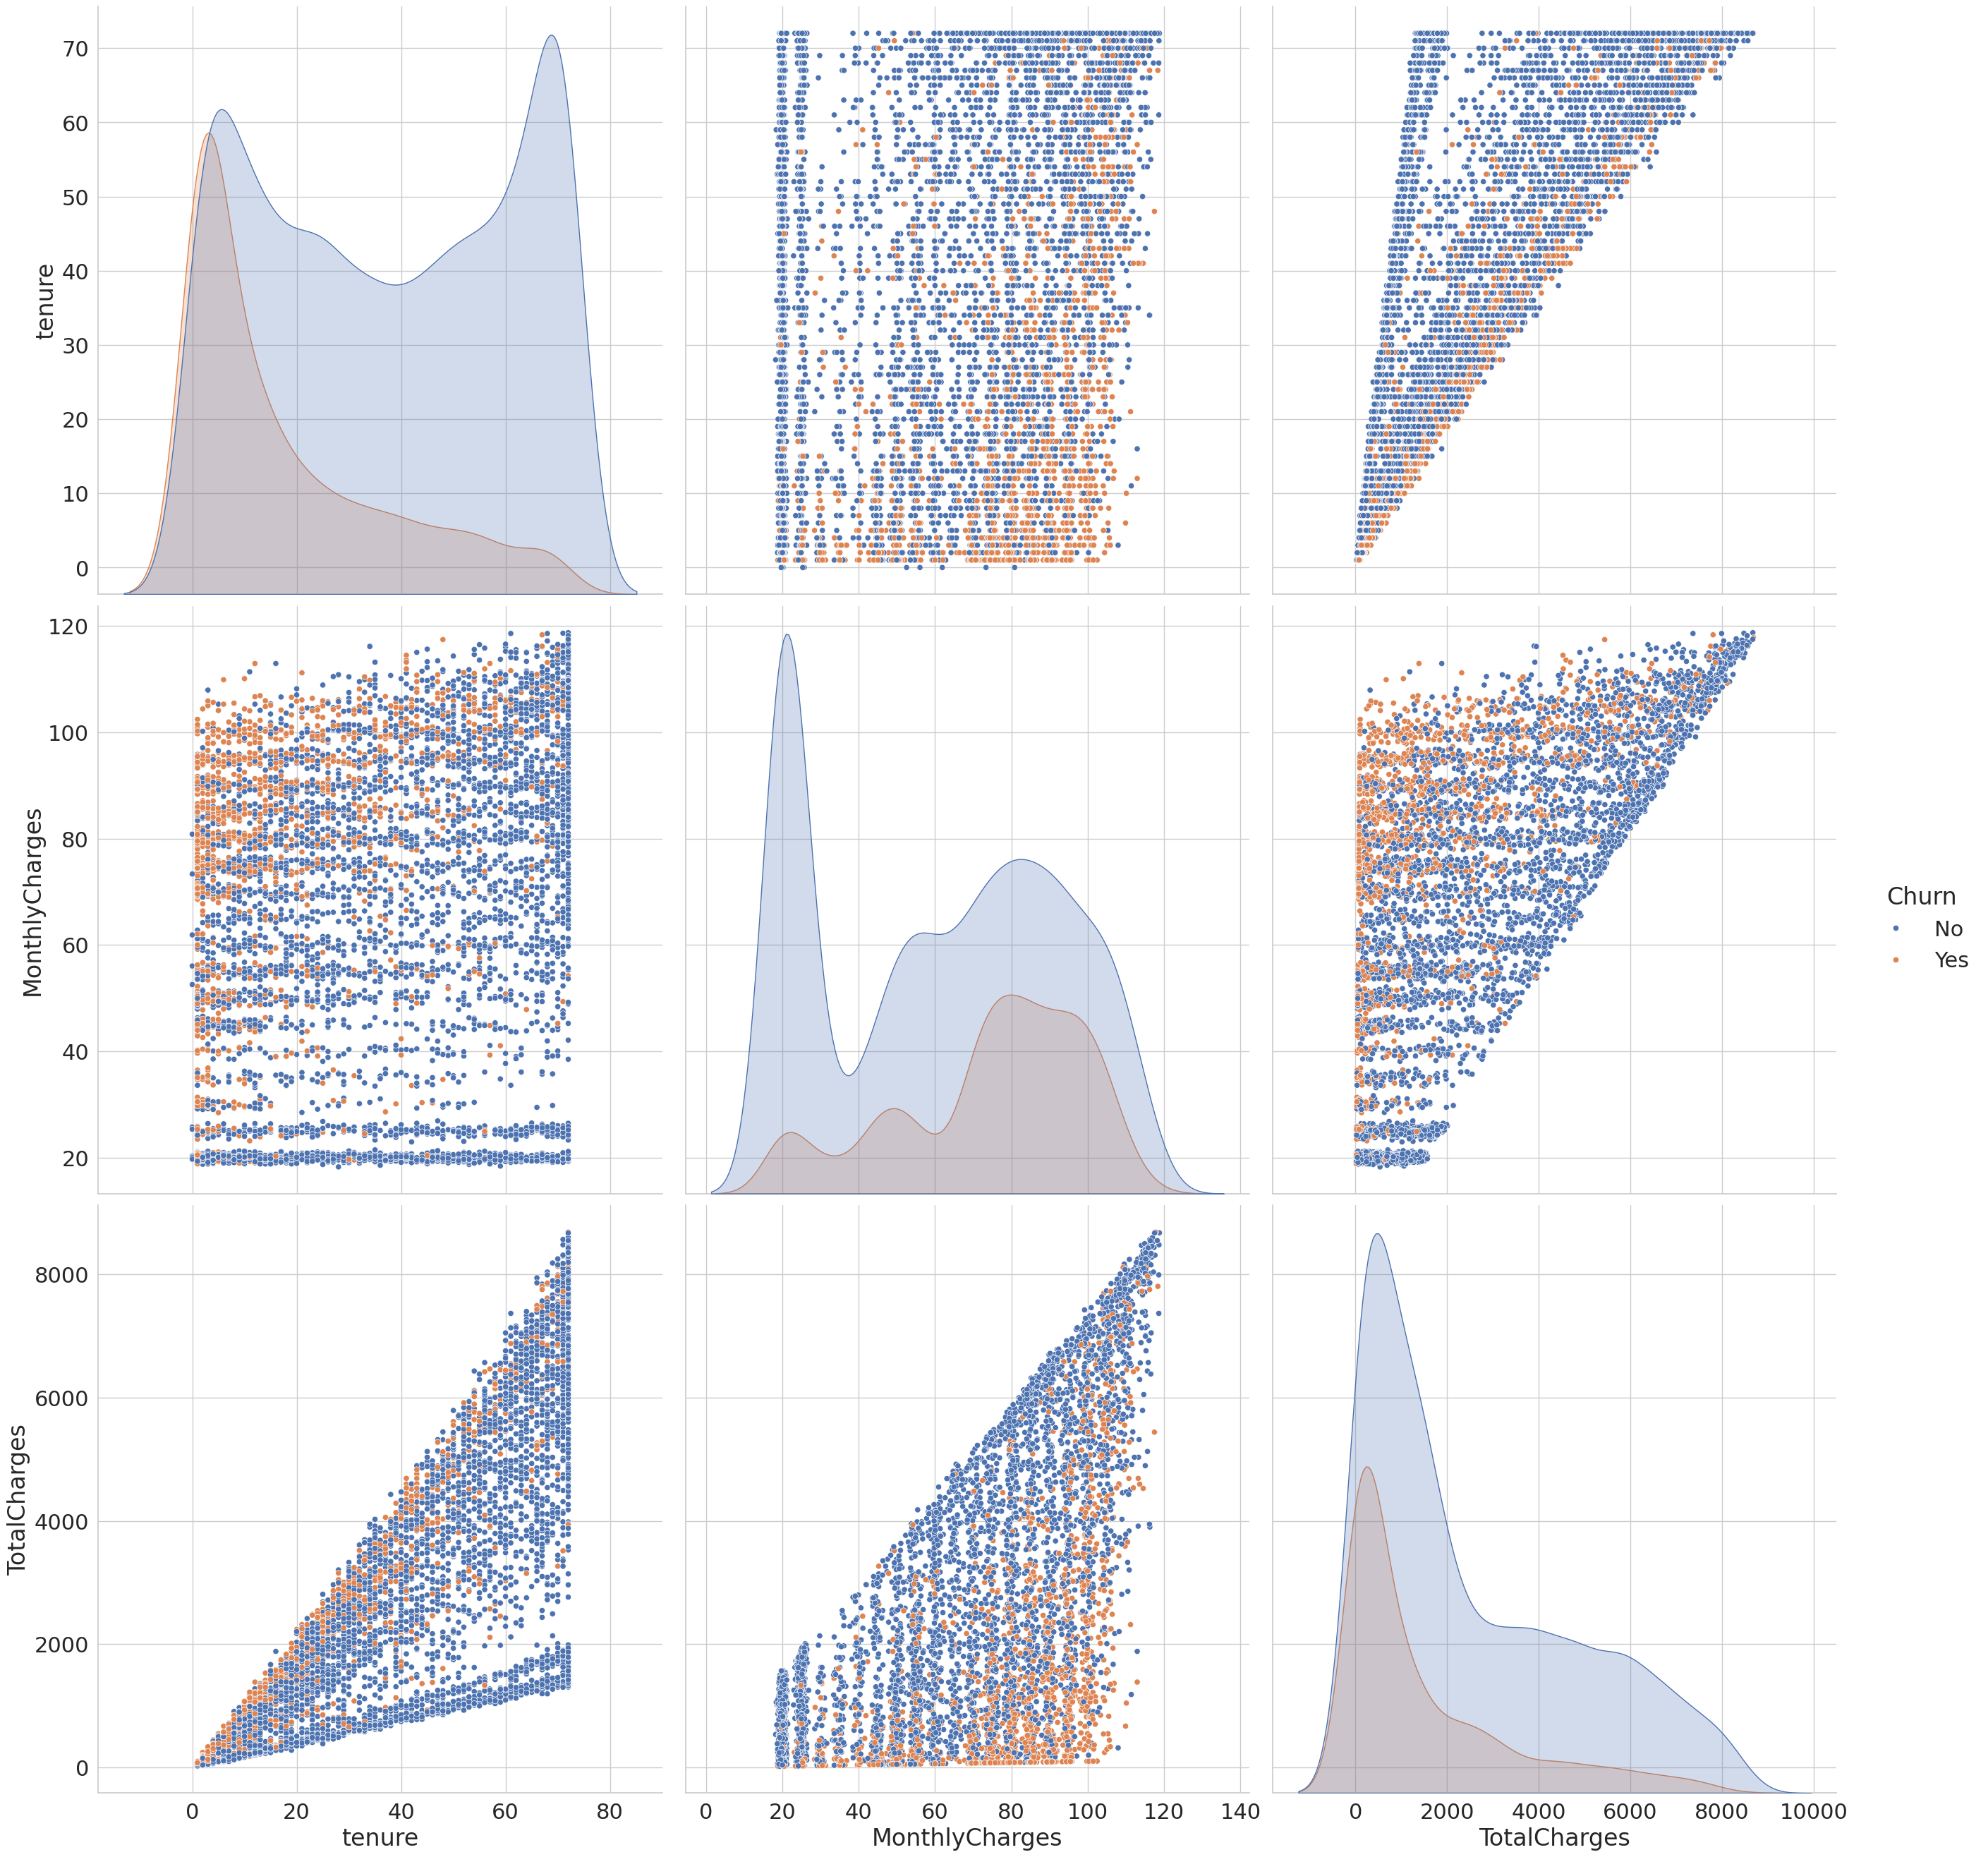

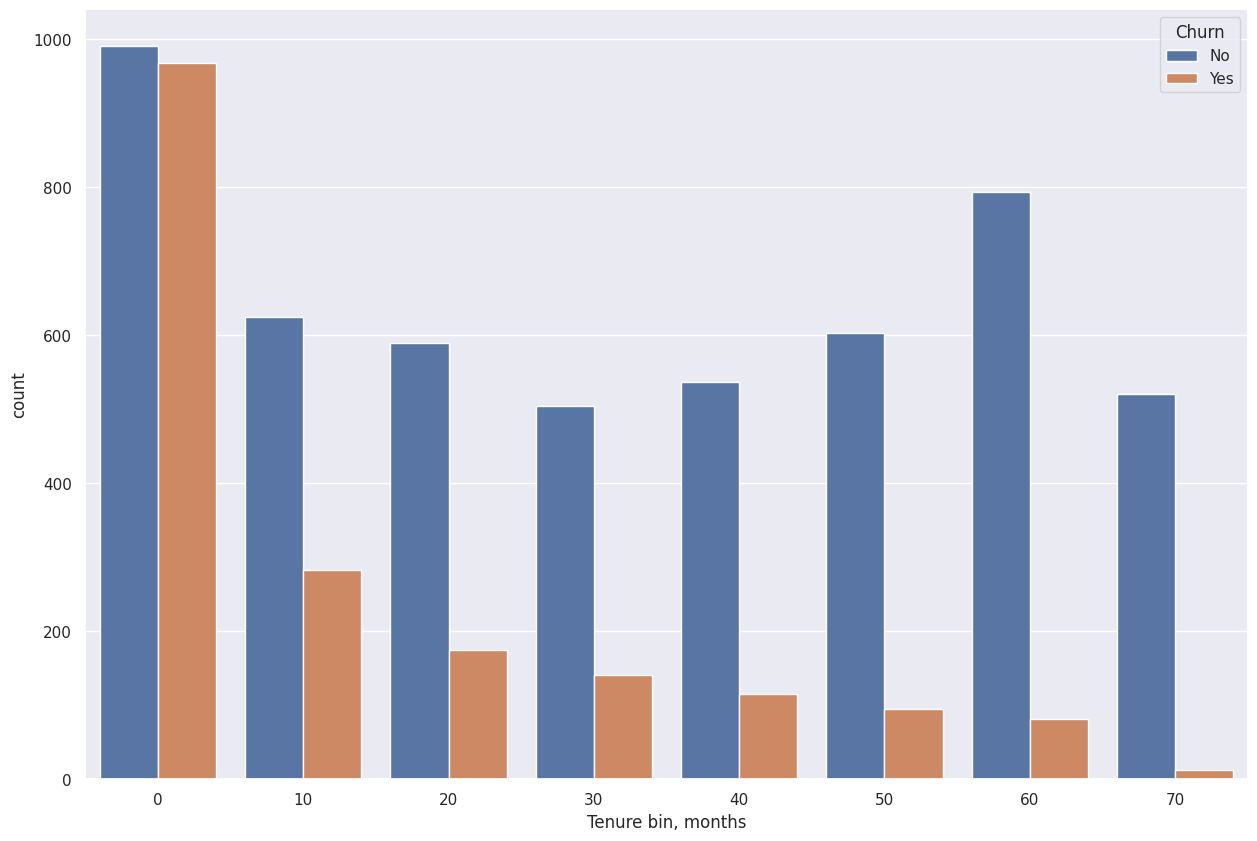

In [14]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
%matplotlib inline
import pandas as pd
from scipy import stats
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
sns.set_style(style='whitegrid')
#open the dataset
df = pd.read_csv('sample_data/telco_customer_churn.csv')
#first few rows
df.head()
def resumetable(df):
    '''
    Returns few key metrics of a dataframe.
    '''
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2)

    return summary
resumetable(df)
#Replacing spaces with null values in total charges column
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)
#convert to float type
df["TotalCharges"] = df["TotalCharges"].astype(float)
#Relable 1 and 0 with yes and no, repectively for consistency
df['SeniorCitizen'] = df.SeniorCitizen.replace({1:"Yes", 0:"No"})
df.columns[1:-3]
categories = list(df.columns[1:-3])
categories.pop(4)
categories
non_cats = []
for item in enumerate(list(~df.columns.isin(categories))):
    if item[1] == True:
        non_cats.append(df.columns[item[0]])
non_cats.pop(0)
non_cats.pop(-1)
#Non-categorical features
non_cats
for cat in categories:
    fig, ax = plt.subplots(figsize = (10,10))
    churn_no = []
    churn_yes = []
    x = []
    for i in df[cat].unique():
        #each category has a sub-category: e.g. Gender category has male and female
        #looping through each subcategory and adding churn and no churn data to list
        churn_no.append(df.groupby([cat, 'Churn']).size()[i][0])
        churn_yes.append(df.groupby([cat, 'Churn']).size()[i][1])
        x.append(i)
    #print(churn_no, churn_yes)

    p1 = plt.bar(x, churn_no)
    p2 = plt.bar(x, churn_yes, bottom=churn_no)

    #Plotting the bar labels inside the bars, as percentage
    for r1, r2, in zip(p1, p2):
        height1 = r1.get_height()
        height2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., #x
                 height1 / 2., #y
                 f'{round(height1 / (height1 + height2)*100,1)} %', #s
                 ha="center", va="center", color="white", fontsize=12)
        plt.text(r2.get_x() + r2.get_width() / 2., #x
                 height1 + height2 / 2., #y
                 f'{round(height2 / (height1 + height2)*100,1)} %', #s
                 ha="center", va="center", color="white", fontsize=12)



    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Number of Customers in Category', fontsize=12)
    plt.legend(['No Churn','Churn'])
    plt.title(cat, fontsize=16)
    plt.show()
    fig, ax = plt.subplots(figsize = (10,10))
df.tenure[df.Churn == 'Yes'].hist(bins=20)
df.tenure[df.Churn == 'No'].hist(bins=20, alpha=0.5)
plt.legend(['Churn Customers', 'Non-Churn Customers'])
plt.title('Customer Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count of Customers')
fig, ax = plt.subplots(figsize = (10,10))
df.MonthlyCharges[df.Churn == 'Yes'].hist(bins=20)
df.MonthlyCharges[df.Churn == 'No'].hist(bins=20, alpha=0.5)
plt.legend(['Churn Customers', 'Non-Churn Customers'])
plt.title('Customer Monthly Charges')
plt.xlabel('Monthly Charge Amount')
plt.ylabel('Count of Customers')
fig, ax = plt.subplots(figsize = (10,10))
df.TotalCharges[df.Churn == 'Yes'].hist(bins=20)
df.TotalCharges[df.Churn == 'No'].hist(bins=20, alpha=0.5)
plt.legend(['Churn Customers', 'Non-Churn Customers'])
plt.title('Customer Total Charges')
plt.xlabel('Total Charge Amount')
plt.ylabel('Count of Customers')
df.groupby('Churn').size().values
df.groupby('Churn').size()
fig, ax = plt.subplots(figsize = (10,10))
labels = 'No Churn', 'Churn'
x = df.groupby('Churn').size().values
ax.pie(x, autopct='%1.1f%%', labels=labels)
plt.show()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.columns
categories
non_cats
other = ['customerID', 'Churn']
df.dtypes
encoded_df = pd.DataFrame()
for item in categories:
    encoded_df[item] = le.fit_transform(df[item].values)
for item in non_cats:
    encoded_df[item] = df[item]
for item in other:
    encoded_df[item] = le.fit_transform(df[item].values)
encoded_df.head()
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(15, 15))
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap="Blues", annot=True, fmt=".2f", linewidths=.2)
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()
heatMap(encoded_df)
sns.set(font_scale=2)
sns.set_style(style='whitegrid')
sns.pairplot(df, hue="Churn", height=9)
df.tenure.describe()
df['tenure_bin'] = pd.cut(df.tenure, bins=[0,10,20,30,40,50,60,70,80], labels=[0,10,20,30,40,50,60,70])
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(x='tenure_bin', hue='Churn', data=df)
plt.xlabel('Tenure bin, months')
encoded_df['tenure_bin'] = df.tenure_bin
